# _Bibliotecas_

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import linregress

## _Datas Frames utilizados_

In [3]:
data = pd.read_csv(r"C:\Users\jaozi\Faculdade\Programação\Introdução à Ciência de Dados\Projeto - Pokemon\Datasets\Pokemon_animes_VF.csv")
frame = pd.read_csv(r"C:\Users\jaozi\Faculdade\Programação\Introdução à Ciência de Dados\Projeto - Pokemon\Datasets\filmes bilheterias.csv")

#### Filtração de dados para os itens à serem analisados

In [90]:
anime = data.filter(items=['title', 'type', 'score', 'scored_by', 'episodes', 'favorites', 'start_date', 'end_date',
                           'start_year', 'start_season', 'title_english']) 
anime = anime[anime['type'] != 'music']

filme = frame.filter(items=['title', 'type', 'score', 'scored_by', 'favorites', 'start_year',
                           'start_season', 'gross', 'title_english'])

In [91]:
animes_tv = anime[anime['type'] == 'tv']
animes_tv = animes_tv.sort_values(by='start_year', ascending=True)

In [92]:
animes_movies = filme.sort_values(by='start_year', ascending=True)
animes_movies['title'] = animes_movies['title_english']

# _Medidas de Centralidade e Dispersão_

##### Funções para calcular a Média, a Mediana, a Variância e o Desvio padrão de determinada coluna

In [93]:
def Media(data, column):
    return np.mean(data[column])

def Mediana(data, column):
    return np.median(data[column])

def Variancia(data, column):
    return np.var(data[column])

def DesvioPadrao(data, column):
    return np.std(data[column])

def Correlacao(data, column1, column2):
    return data[column1].corr(data[column2])

## Medidas de Centralidade e Dispersão das Séries Animadas de Pokémon:

In [94]:
print(f"Média: {Media(animes_tv, 'score'):.2f}")
print(f"Mediana: {Mediana(animes_tv, 'score'):.2f}")
print(f"Variância: {Variancia(animes_tv, 'score'):.2f}")
print(f"Desvio Padrão: {DesvioPadrao(animes_tv, 'score'):.2f}")

Média: 7.07
Mediana: 7.19
Variância: 0.21
Desvio Padrão: 0.46


## Medidas de Centralidade e Dispersão dos Filmes de Pokémon:

In [95]:
print(f"Média: {Media(animes_movies, 'score'):.2f}")
print(f"Mediana: {Mediana(animes_movies, 'score'):.2f}")
print(f"Variância: {Variancia(animes_movies, 'score'):.2f}")
print(f"Desvio Padrão: {DesvioPadrao(animes_movies, 'score'):.2f}")

Média: 6.89
Mediana: 6.89
Variância: 0.13
Desvio Padrão: 0.36


# _Gráficos_

Aqui vamos apresentar alguns gráficos acerca das animações de Pokémon. Primeiro, vamos declarar a nossa paleta de cores.

In [96]:
sns.set_palette(palette='pastel')

### _Gráficos Boxplot_

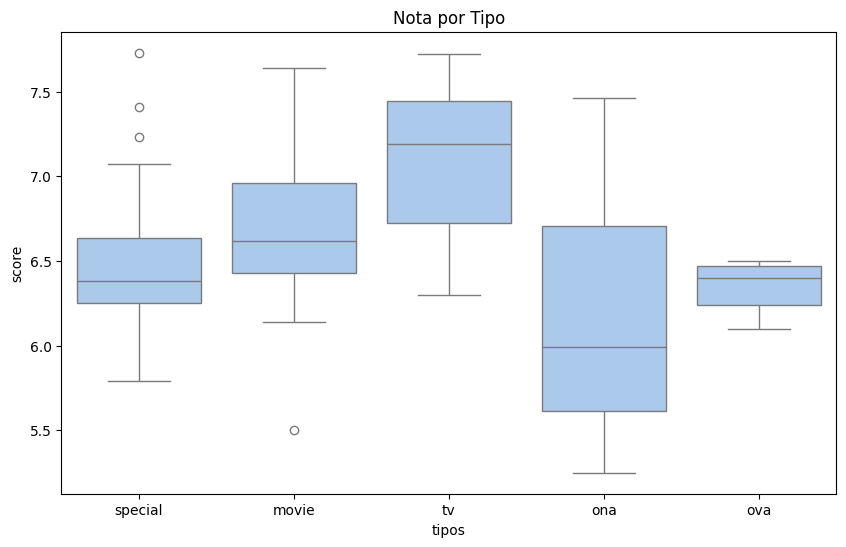

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=anime, x='type', y='score')
plt.title('Nota por Tipo')
plt.xlabel('tipos')
plt.ylabel('score')
plt.show()

Acima está os boxplots das notas entre todos os tipos de animações da franquia Pokémon. 

Special é um termo bem abrangente no meio dos animes, pois podem se referir à episódios de recapitulação da história, episódios contando uma história extra/especial entre uma temporada e outra ou podem, até mesmo, ser uma continuação direta da história principal. Tv Special é composta, normalmente, por apenas um episódio.

Movie se refere à todos filmes da franquia. Ao todo foram 23 filmes lançados até o ano de 2020, sendo 21 deles histórias originais e 2 reboots. 

Tv são os animes lançados na Tv Japonesa. Contando tudo, são mais de 20 temporadas lançadas e mais de 1300 episódios. Sendo lançado desde 1997, cada temporada é uma reimaginação da história do jogo de mesmo nome.

Ona (Original Web Animation) são episódios lançados diretamente na internet.

Ova (Original Video Animation) são episódios lançados diretamente no dvd que não foram ao ar na televisão. Podem ser tanto adaptação do material original, quanto uma história original.

### _Gráfico de Sino_
##### Como estão concentrada as notas das animações? e dos Filmes?

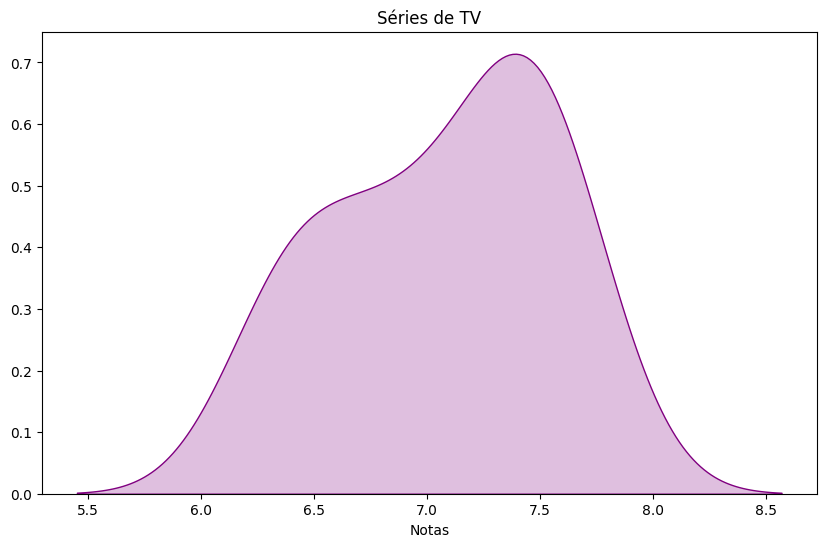

In [98]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=animes_tv, x='score', color='purple', fill=True)
plt.title("Séries de TV")
plt.xlabel("Notas")
plt.ylabel('')
plt.show()

Como informa o gráfico acima, vemos uma maior centralização de dados entre 7 e 7.5. Portanto, podemos considerar que as séries animadas agradam bastante o público.

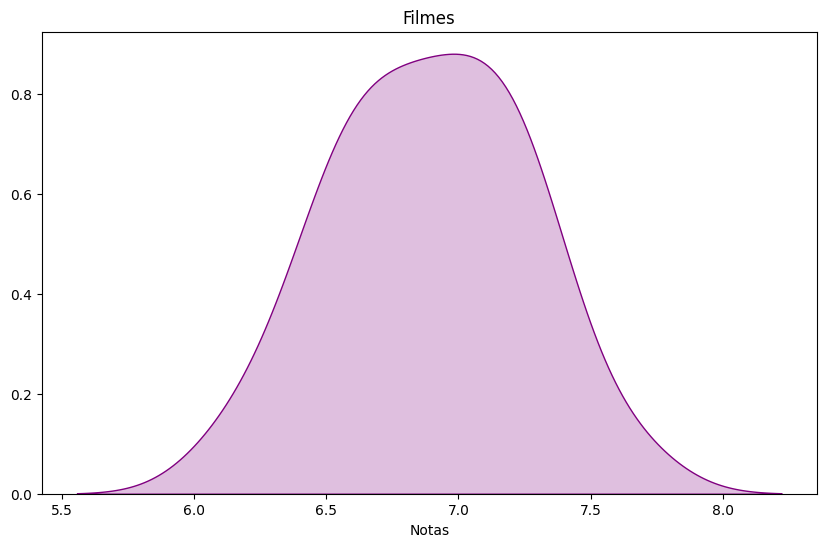

In [99]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=animes_movies, x='score', color='purple', fill=True)
plt.title("Filmes")
plt.xlabel("Notas")
plt.ylabel('')
plt.show()

Já nos filmes, vemos uma densisade maior por volta da nota 7. Podemos considerar que os filmes agradam consideravelmente o público.

### _Gráfico de Barras_
##### Quais são as séries e os filmes mais bem avaliados pelo público?

Aqui iremos responder a pergunta principal do nosso projeto. Quais são as temporadas e os filmes mais bem avaliado pelo público? Para responder a essa pergunta, iremos separar o nosso data frame em dois.

In [100]:
quantMinima = 50000
top5 = animes_tv[animes_tv['scored_by'] >= quantMinima]

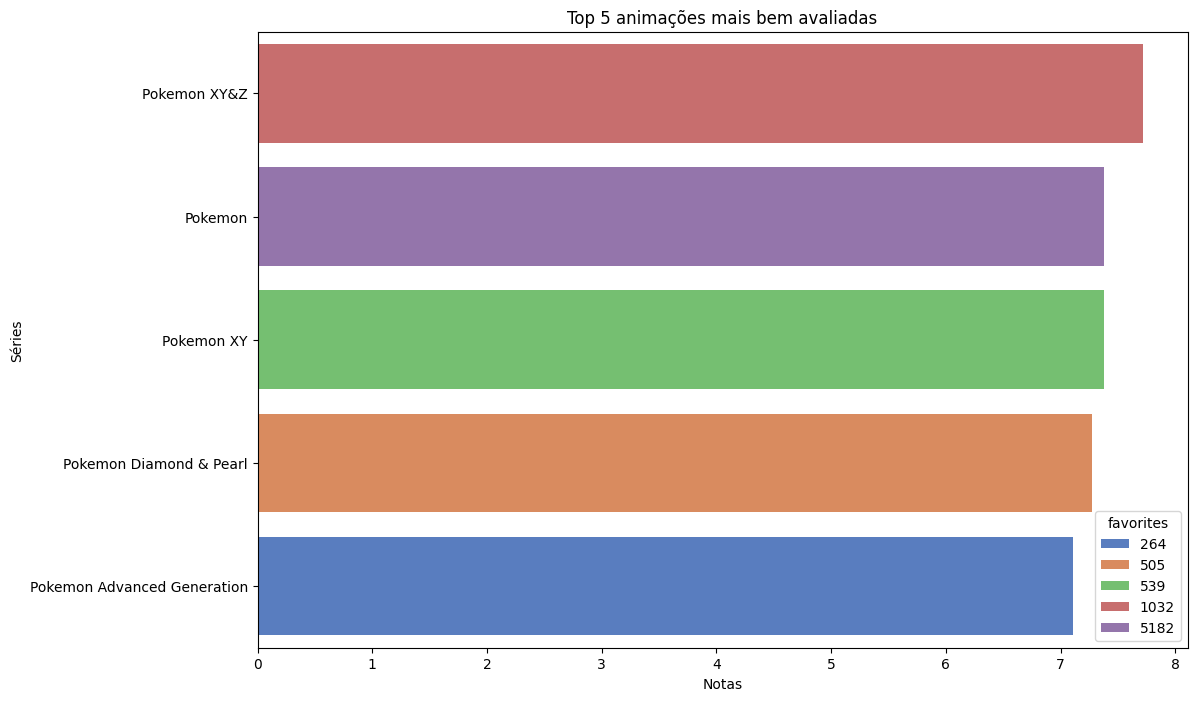

In [101]:
top5 = top5.sort_values(by='score', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=top5[:5], x='score', y='title', hue='favorites', palette='muted')
plt.title("Top 5 animações mais bem avaliadas")
plt.xlabel("Notas")
plt.ylabel("Séries")
plt.show()

Para avaliar o top 5 animações, foi determinado uma quantidade mínima de 50000 mil (cinquenta mil) pessoas que tenham classificado tais temporadas. A partir disso, criamos uma nova variável chamada de "top5", na qual receberá o data frame filtrado com as animações que atendem a quantidade mínima pré definida. Tendo um data frame filtrado, o ordenamos em ordem decrescente para pegar as séries com as maiores notas e declaramos o barplot com as colunas "title" e "score", título e coluna respectivamente, além de "favorites" como o hue.

Pokémon XY&Z assume o primeiro lugar com uma nota de 7.72, tendo sido avaliado por 87 mil pessoas, onde 1032 delas a favoritaram. Em segundo lugar aparece a primeira série animada de Pokémon, lançada em 1997, com 7.38 de nota e com mais de 380 mil avaliações além de ter sido favoritado por mais de 5 mil pessoas. Em terceiro vêm Pokémon XY, a primeira temporada, também com uma nota de 7.38, 100 mil pessoas e 539 favoritos. Em sequência temos Pokémon Diamond & Pearl, nota 7.27, 87 mil pessoas e 505 favoritos e Pokémon Advanced Generation, nota 7.11, 114 mil pessoas e 264 favoritos.

In [102]:
quantmin = 50000
top10_movies = animes_movies[animes_movies['scored_by'] >= quantmin]

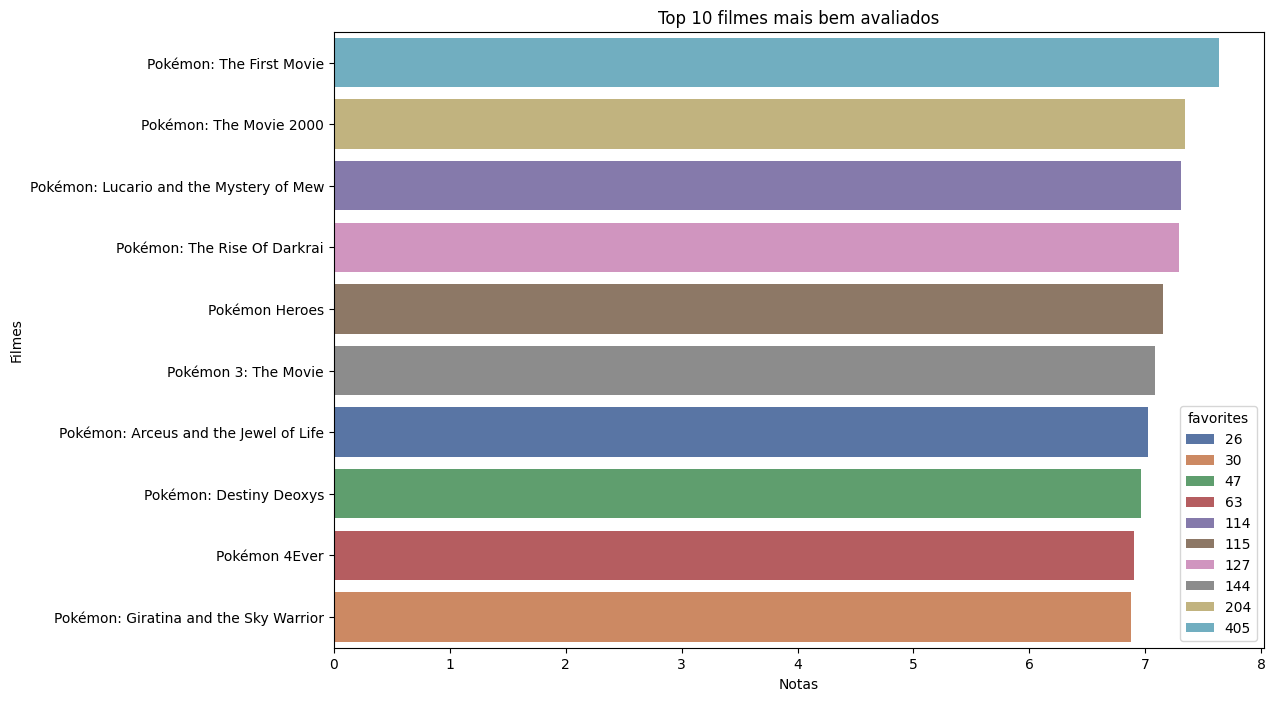

In [103]:
top10_movies = top10_movies.sort_values(by='score', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_movies[:10], x='score', y='title', hue='favorites', palette='deep')
plt.title("Top 10 filmes mais bem avaliados")
plt.xlabel("Notas")
plt.ylabel("Filmes")
plt.show()

Utilizando o mesmo método que o barplot das séries animadas, aplicamos uma quantidade mínima de 50000 mil (cinquenta mil) pessoas que tenham classificado tais filmes. Por ter mais filmes que satisfazem a quantidade mínima de avaliações, diferente do barplot anterior, criamos uma variável denominada "top10_movies", onde será armazenada o data frame filtrado pela coluna que atende ao pré requisito. Por fim, declaramos o barplot igualmente as séries animadas.

Em primeiro lugar, sem muitas surpresas, temos o primeiro filme Pokémon lançado, em 1998, com uma nota de 7.64, tendo sido avaliado por mais de 170 mil pessoas e favoritado por 405. Em segundo lugar vêm Pokémon the movie: 2000, o segundo filme lançado, com 7.34 de nota, 121 mil avaliações e favoritado por 204. Em terceiro temos o sétimo filme da franqua, Pokémon Lucario, com 7.31 de nota, avaliado por 72 mil pessoas e favoritado por 114. Em quarto aparece o nono filme da franquia, Pokémon The Rise of Darkrai, 7.29, 70 mil avaliações e 127 favoritos e em quinto vêm o Pokémon Heroes, quinto filme da franquia, com 7.15 nota, 74 mil avaliações e 115 favoritos. O top 6 ao 10 é composto por, respectivamente, Pokémon 3: The movie, 7.08, 112 mil e 144 favs; Pokémon Arceus, 7.02, 80 mil e 26 favs; Pokémon Destiny, 6.96, 70 mil e 47 favs; Pokémon 4ever, 6.90, 96 mil e 63 favs; Pokémon Giratinaa, 6.88, 54 mil e 30 favs; Pokémon Ranger, 6.78, 51 mil e 46 favs; Pokémon Jirachi, 6.74, 59 mil e 26 favs.

Quando falamos analisar os dados de filmes, pensamos em que? Em nota dos críticos/público e a sua bilheteria! Portanto, vamos analisar a bilheteria dos filmes Pokémon no Japão.

# _Bilheteria dos Filmes Pokémon_
### Boxplot

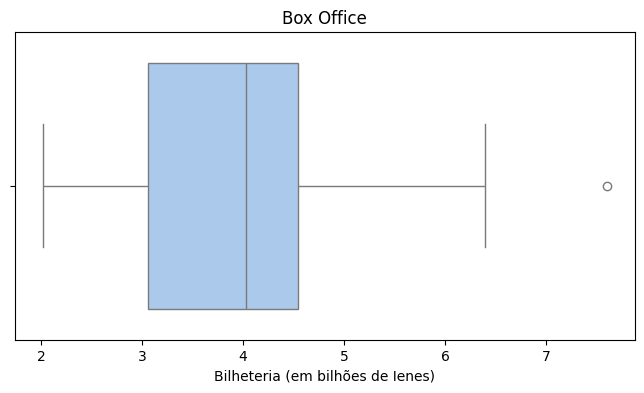

In [104]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=animes_movies, x='gross')
plt.title('Box Office')
plt.xlabel('Bilheteria (em bilhões de Ienes)')
plt.show()

## Como foi essa arrecadação durante os anos?

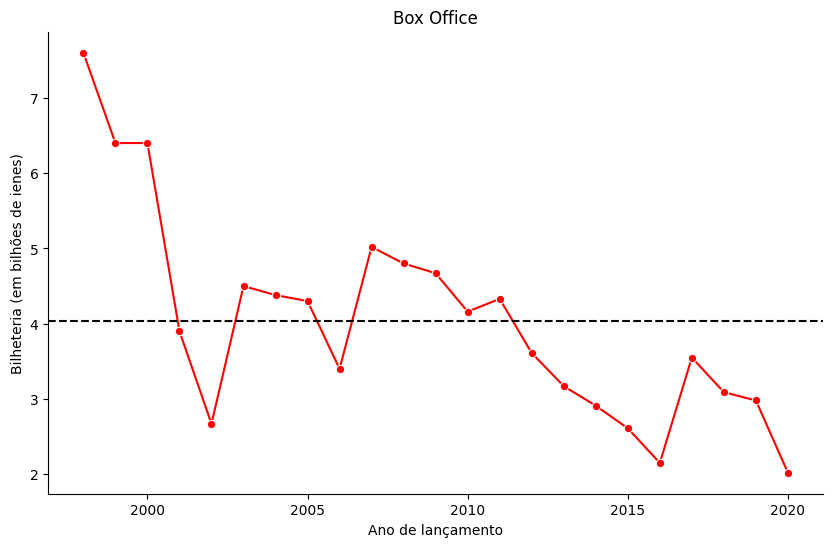

In [253]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=animes_movies, x='start_year', y='gross', marker='o', color='red')
sns.despine()
plt.axhline(y=animes_movies['gross'].mean(), color='black', linestyle='--', label=f'Média Geral de Bilheteria')
plt.title("Box Office")
plt.xlabel("Ano de lançamento")
plt.ylabel("Bilheteria (em bilhões de ienes)")
plt.show()

Analisando o gráfico, vemos que o pico de bilheteria foi no primeiro filme, lançado no ano de 1998, com mais de 7 bilhões de Ienes arrecadados. Após isso, podemos notar que, com o decorrer dos anos, o Box Office dos filmes forem decaindo chegando até 2 bilhões de Ienes, no último filme lançado em 2020, Pokémon: Secret of The Jungle. Entretanto, vemos que a uma boa parte dos filmes arrecadam uma bilheteria acima da média, ficando entre 4 bilhões e 5 bilhões de ienes.

### _Existe alguma correlação entre as notas do público e a bilheteria?_

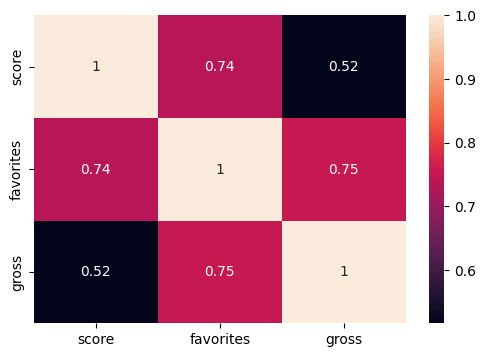

In [177]:
data_c = animes_movies[['score', 'favorites', 'gross']]
data_corr = data_c.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(data_corr, annot=True)
plt.show()

É visível que as notas possuem uma correlação maior com a quantidade de favoritos, o mesmo vale para a bilheteria, que possui uma forte correlação. Já entre nota e bilheteria, podemos notar uma correlação mediana.

Vamos aplicar o KMeans e verificar se podemos identificar grupos entre os filmes.

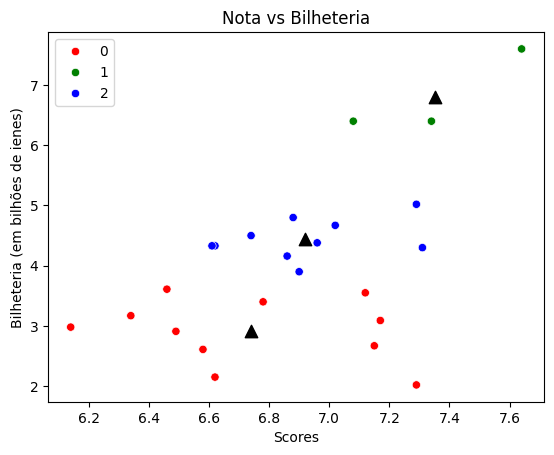

In [264]:
colors = ['red', 'green', 'blue']
df_group = animes_movies[['score', 'gross']]
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
kmeans.fit(df_group)

sns.scatterplot(data=df_group, x='score', y='gross', hue=kmeans.labels_, palette=colors)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=80, marker='^', color='black')
plt.plot()
plt.title("Nota vs Bilheteria")
plt.xlabel("Scores")
plt.ylabel("Bilheteria (em bilhões de ienes)")
plt.show()

Analisando em 3 grupos, podemos separa-los em: Grupo 0 - são os filmes que arrecadaram entre 2 bilhões e 4 bilhões de ienes, na qual tem uma variação de nota entre 6 e 7.3; Grupo 2 - são os filmes que arrecadaram acima de 4 bilhões e abaixo de 6 bilhões, porém, é onde concentra filmes com notas consideradas boas, variando entre 6.6 e 7.4; Já no Grupo 1 - temos os filmes que arrecadaram mais de 6 bilhões e tiveram notas consideradas boas, acima de 7.0.

# _Conclusão_

Sendo lançado continuamente anualmente por quase 30 anos, foram as animações que expandiram os horizontes da franquia, a apresentando para um público de diversas idades através de suas séries animadas e cativando novos fãs para seus jogos. Após analisar os dados sobre as animações de Pokémon, vemos que é uma área da franquia de considerável sucesso. São mais de 25 temporadas com mais de 1300 episódios sobre a aventura de um garoto no mundo de rinha de animais com poderes, tendo uma média de 6.9 em nota, as séries animadas são o pilar de pokémon na mídia de entretenimento audiovisual. Por mais que seus filmes tenham decaído em bilheteria no Japão, a franquia ainda move milhões de pessoas para os cinemas ao redor do mundo.